# K-Means Clustering

We have given a collection of 8 points. P1=[0.1,0.6] ,P2=[0.15,0.71], P3=[0.08,0.9] P4=[0.16, 0.85], P5=[0.2,0.3], P6=[0.25,0.5], P7=[0.24,0.1], P8=[0.3,0.2]. Perform the k-mean clustering with initial centroids as m1=P1 = Cluster#1=C1 and m2=P8=cluster#2=C2. Answer the following: <br/>
1] Which cluster does P6 belong to?<br/>
2] What is the population of cluster around m2?  <br/>
3] What is updated value of m1 and m2?<br/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = [
           [0.1,0.6],
           [0.15,0.71],
           [0.08,0.9],
           [0.16, 0.85],
           [0.2,0.3],
           [0.25,0.5],
           [0.24,0.1],
           [0.3,0.2]     
]
data = pd.DataFrame(dataset, columns=['X', 'Y'])
data.head()

,X,Y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30


In [ ]:
X = np.array(data)
centroids = np.array([
            [0.1, 0.6],
            [0.3, 0.2]
])
centroids

array([[0.1, 0.6],
       [0.3, 0.2]])

In [ ]:
class K_Means:
  def __init__(self, k = 2, tol = 0.01, max_iter = 300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    self.cur_centroid = []

  def get_cluster(self, data):
    distances = []
    x1, y1 = data[0], data[1]
    for centroid in self.cur_centroid:
      x2, y2 = centroid[0], centroid[1]
      distances.append((y2-y1)**2 + (x2-x1)**2)
    
    classification = distances.index(min(distances))
    return classification

  def fit(self, data, centroid):
    self.cur_centroid = centroid
    new_centroids = []

    iter = 0
    while iter < self.max_iter:
      i = 0
      cur_clusters = [[] for i in range(self.k)]

      for pt in data: cur_clusters[self.get_cluster(pt)].append(pt)

      new_centroids = [
                       np.average(
                           cur_clusters[i], axis=0
                       ) for i in range(self.k)
      ]

      optimized = True

      for i in range(len(self.cur_centroid)):
        if (
            np.abs(
                np.sum(
                    (new_centroids[i] - self.cur_centroid[i])/self.cur_centroid[i]
                )
            )
        ): 
          optimized = False
      
      if optimized == True: break

      self.cur_centroid = new_centroids
      iter += 1
    
    print("Final centroids", self.cur_centroid)
    return cur_clusters, self.cur_centroid


In [ ]:
km = K_Means()
clusters, centroids = km.fit(X, centroids)

Final centroids [array([0.148, 0.712]), array([0.24666667, 0.2       ])]


## Before Clustering

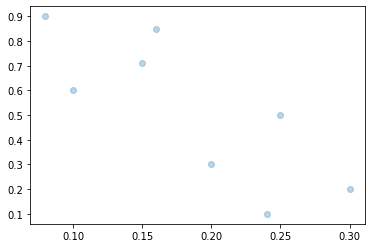

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.show()

## After Clustering

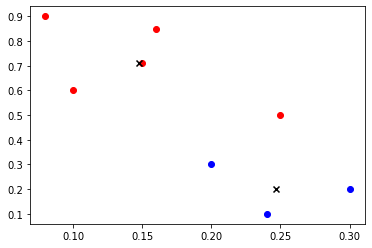

In [ ]:
colors = ['r', 'b']
plt.figure()

for i in range(len(clusters)):
  for c in clusters[i]:
    plt.scatter(c[0], c[1], color = colors[i])

for centroid in centroids:
  plt.scatter(
      centroid[0],
      centroid[1],
      marker = 'x',
      color = 'black'
  )

plt.show()